### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

* Display the total number of players


In [19]:
#the total number of players
total_players = purchase_data["SN"].value_counts().count()
#print(total_players)

# convert total players tob DataFrame
total_players_df = pd.DataFrame({"Total Players": [total_players]})
total_players_df

,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [20]:
#Purchasing Analysis (Total)
#Run basic calculations to obtain number of unique items, average price, etc.

# Number of uniqe items:
unique_items = purchase_data["Item ID"].value_counts().count()
#print(unique_items)

#Average Price:
avrg_price = purchase_data["Price"].mean()
#print(avrg_price)

# Number of Purchases:
num_purchases = purchase_data["Item ID"].count()
#print(num_purchases)

# Total Revenue:
total_revenue = purchase_data["Price"].sum()
#print(total_revenue)

#Summary data frame to hold the results
purchasing_analisis_df = pd.DataFrame({"Number of uniqe items": [unique_items],
                                      "Average Price": [avrg_price],
                                      "Number of Purchases": [num_purchases],
                                      "Total Revenue": [total_revenue]})
#purchasing_analisis_df

#Optional: give the displayed data cleaner formatting
purchasing_analisis_df["Average Price"] = purchasing_analisis_df["Average Price"].map("${:.2f}".format)
purchasing_analisis_df["Total Revenue"] = purchasing_analisis_df["Total Revenue"].map("${:,}".format)

#Display the summary data frame
purchasing_analisis_df

,Number of uniqe items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [31]:
#Gender Demographics
new_group_df = purchase_data.groupby(["Gender"])

# Counting Players by Gender
gender_count = new_group_df.nunique()["SN"]

# Percentage
percentage = gender_count / total_players

#Display the summary data frame
gender_demographics_df = pd.DataFrame({"Total Count": gender_count,
                                      "Percentage of Players": percentage})
# Data formatting
gender_demographics_df["Percentage of Players"] = gender_demographics_df["Percentage of Players"].map("{:.2%}".format)

# Sorting the above table by Percentage of Players value in descending order
gender_demographics_df.sort_values("Percentage of Players", ascending=False)


,Total Count,Percentage of Players
Gender,,
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [22]:
#Purchasing Analysis (Gender)

#Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender

#Purchase Count
purchase_count_gender = purchase_data["Gender"].value_counts()

#average_purchase_price
avrg_price_gender = new_group_df["Price"].mean()

#total_purchase_value
total_purchase_gender = new_group_df["Price"].sum()

#avg_total_purchase_per_person
avg_total_purchase_per_person_gender = total_purchase_gender / gender_count 

# #Display the summary data frame
purchasing_analysis_gender_df = pd.DataFrame({"Purchase Count": purchase_count_gender,
                                      "Average Purchase Price": avrg_price_gender,
                                      "Total Purchase Value": total_purchase_gender,
                                      "Avg Total Purchase per Person": avg_total_purchase_per_person_gender})

# Data formatting
purchasing_analysis_gender_df.style.format({"Average Purchase Price": "${:.2f}",
                                           "Total Purchase Value": "${:,.2f}",
                                           "Avg Total Purchase per Person": "${:.2f}"})

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [23]:
#Age Demographics
#purchase_data.head()

#Establish bins for ages and groups
bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]

group_labels = ["<10", "10-14","15-19","20-24","25-29","30-34","35-39","40+"]

#Categorize the existing players using the age bins. Hint: use pd.cut() &
#Place the data series into a new column inside of the DataFrame
purchase_data['Age Group'] = pd.cut(purchase_data["Age"], bins, labels=group_labels)

#Calculate the numbers by age group
purchase_data_group = purchase_data.groupby(["Age Group"])
numbers = purchase_data_group.nunique()["SN"]

#Calculate the percentages by age group
persentages_by_group = numbers / total_players

#Create a summary data frame to hold the results
age_demographics_df = pd.DataFrame({"Total Count": numbers, "Percentage of Players": persentages_by_group})


#Optional: round the percentage column to two decimal points
age_demographics_df["Percentage of Players"] = age_demographics_df["Percentage of Players"].map("{:.2%}".format)

#Display Age Demographics Table
age_demographics_df

,Total Count,Percentage of Players
Age Group,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [24]:
# Purchasing Analysis (Age)
# Bin the purchase_data data frame by age
bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]

group_labels = ["<10", "10-14","15-19","20-24","25-29","30-34","35-39","40+"]

#Categorize the existing players using the age bins. Hint: use pd.cut() &
#Place the data series into a new column inside of the DataFrame
purchase_data['Age Group'] = pd.cut(purchase_data["Age"], bins, labels=group_labels)

#Calculate the numbers by age group
purchase_data_group = purchase_data.groupby(["Age Group"])

# I am using "purchase_data_group" form the previous Step.
purchase_count = purchase_data_group["Purchase ID"].count()
#print(purchase_count)

# Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below
average_purchase_price = purchase_data_group["Price"].mean()
#print(average_purchase_price)

total_purchase_value = purchase_data_group["Price"].sum()
#print(total_purchase_value)

avg_total_purchase_per_person = total_purchase_value / numbers # "numbers" - is a value from previous step
#print(avg_total_purchase_per_person)

# Create a summary data frame to hold the results
purchasing_analysis_df = pd.DataFrame({"Purchase Count": purchase_count, "Average Purchase Price": average_purchase_price, "Total Purchase Value": total_purchase_value, "Avg Total Purchase per Person": avg_total_purchase_per_person})

# Optional: give the displayed data cleaner formatting
purchasing_analysis_df = purchasing_analysis_df.style.format({"Average Purchase Price": "${:.2f}",
                                           "Total Purchase Value": "${:,.2f}",
                                           "Avg Total Purchase per Person": "${:.2f}"})

# Display the summary data frame
purchasing_analysis_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Group,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [25]:
# Top Spenders
#Run basic calculations to obtain the results in the table below

purchase_data_group_SN = purchase_data.groupby(["SN"])

purchase_count = purchase_data_group_SN["Price"].count()

average_purchase_price = purchase_data_group_SN["Price"].mean()

total_purchase_value = purchase_data_group_SN["Price"].sum()

#Create a summary data frame to hold the results

top_spenders_df = pd.DataFrame({"Purchase Count": purchase_count, "Average Purchase Price": average_purchase_price, "Total Purchase Value": total_purchase_value})

#Sort the total purchase value column in descending order
sort_top_spenders_df = top_spenders_df.sort_values("Total Purchase Value", ascending=False)

#Optional: give the displayed data cleaner formatting
sort_top_spenders_df["Average Purchase Price"] = sort_top_spenders_df["Average Purchase Price"].map("${:.2f}".format)
sort_top_spenders_df["Total Purchase Value"] = sort_top_spenders_df["Total Purchase Value"].map("${:.2f}".format)

#Display a preview of the summary data frame
sort_top_spenders_df.head()


,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [26]:
# Most Popular Items

#Retrieve the Item ID, Item Name, and Item Price columns

new_df = pd.DataFrame(purchase_data[["Item ID", "Item Name", "Price"]])

#Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value
item_groups = new_df.groupby(["Item ID","Item Name"])
#print(item_group.count())

purchase_count = item_groups["Price"].count()

average_item_price = item_groups["Price"].mean()

total_purchase_value = item_groups["Price"].sum()

#Create a summary data frame to hold the results
most_popular_items = pd.DataFrame({"Purchase Count": purchase_count, 
                                   "Item Price": average_item_price,
                                  "Total Purchase Value": total_purchase_value})

#Sort the purchase count column in descending order
sort_most_popular_items = most_popular_items.sort_values("Purchase Count", ascending=False)

#Optional: give the displayed data cleaner formatting
sort_most_popular_items["Item Price"] = sort_most_popular_items["Item Price"].map("${:.2f}".format)
sort_most_popular_items["Total Purchase Value"] = sort_most_popular_items["Total Purchase Value"].map("${:.2f}".format)


#Display a preview of the summary data frame
sort_most_popular_items.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
132,Persuasion,9,$3.22,$28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [27]:
#Most Profitable Items

#Sort the above table by total purchase value in descending order
sort_most_popular_items_total = most_popular_items.sort_values("Total Purchase Value", ascending=False)

#Optional: give the displayed data cleaner formatting
sort_most_popular_items_total["Item Price"] = sort_most_popular_items_total["Item Price"].map("${:.2f}".format)
sort_most_popular_items_total["Total Purchase Value"] = sort_most_popular_items_total["Total Purchase Value"].map("${:.2f}".format)

#Display a preview of the data frame
sort_most_popular_items_total.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
103,Singed Scalpel,8,$4.35,$34.80


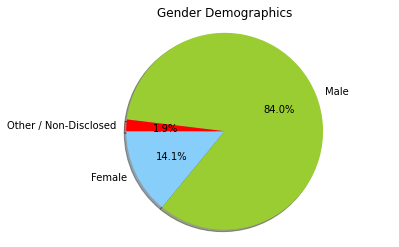

In [47]:
# CONCLUSIONS:

# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt

### Conclution #1 
### Amount of male players in 6 times higher than ammount of female players.

gender = gender_demographics_df.index
numbers = gender_demographics_df["Total Count"]
colors = ["lightskyblue", "yellowgreen", "red"]
explode = (0, 0.0, 0, 0)

plt.title("Gender Demographics")
plt.pie(numbers, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()

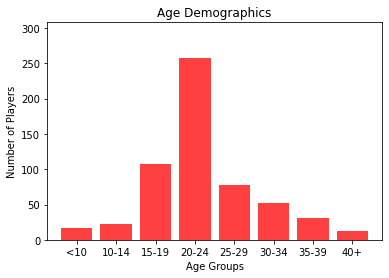

In [61]:
### ### Conclusion #2 (Age Demographics)

age_groups = age_demographics_df.index
tot_numbers = age_demographics_df["Total Count"]

plt.title("Age Demographics")
plt.xlabel("Age Groups")
plt.ylabel("Number of Players")
plt.xlim(-0.75, len(age_groups)-.25)
plt.ylim(0, max(tot_numbers) + 50)

plt.bar(age_groups, tot_numbers, facecolor="red", alpha=0.75, align="center")
plt.show()

